# scikit-learn - Machine Learning in Python

Scikit-learn is a machine learning library for Python. A key feature is that is has been designed to seamlessly interoperate with the scientific libraries NumPy and SciPy, which we have introduced in the previous notebooks, as well as with the graphical library Matplotlib.

It collects a number of algorithms for supervised and unsupervised learning, including
* Classification
    * SVM (`sklearn.svm`)
    * Nearest neighbors (`sklearn.neighbors`)
    * Random forests (`sklearn.ensemble`)
* Regression
    * SVR (`sklearn.svm`)
    * Ridge regression (`sklearn.linear_model`)
    * Lasso (`sklearn.linear_model`)
* Clustering (`sklearn.cluster`)
    * k-Means
    * Spectral clustering
    * Mean-shift
* Dimensionality reduction
    * PCA (`sklearn.decomposition`)
    * Feature selection (`sklearn.feature_selection`)
    * Non-negative matrix factorization (`sklearn.decomposition`)

Scikit-learn also offers modules for model evaluation and selection, including grid search, cross validation and metrics, and for data preprocessing (feature extraction and normalization).

This tutorial has been adapted from materials at [scikit-learn](https://scikit-learn.org) (BSD License).

To access the scikit-learn module, you can import the whole module:

In [1]:
import sklearn

or just the required component(s):

In [2]:
from sklearn import svm

# Basic commands

## Loading a dataset

Scikit-learn ships with some standard datasets, that are ideal for tutorial purposes.

For instance the `digits` dataset is a collection of handwritten digits, suitable for classification tasks:

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

This dataset is a dictionary-like object holding data and metadata. As typical when using scikit-learn, data are stored as a 2D Numpy array, namely the `data` member having shape `n_samples` by `n_features`:

In [4]:
type(digits.data)

numpy.ndarray

In [5]:
digits.data.shape

(1797, 64)

In [6]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Data need to be formatted as a 2D `(n_samples,n_features)` array to be used with the scikit-learn methods. However, original data can have a different shape; in the case of the `digits` dataset the 64 features correspond to the pixels of a 8x8 image. These original data can be accessed through the `images` member, e.g. to inspect the first image:

In [7]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In the case of a supervised problem, response variables are stored in the `target` member, a 1D Numpy array of size `n_samples`:

In [8]:
type(digits.target)

numpy.ndarray

In [9]:
digits.target.shape

(1797,)

In [10]:
print(digits.target)

[0 1 2 ... 8 9 8]


As we are dealing with a classification problem, the set of target classes is available, too, through the `target_names` member:

In [11]:
type(digits.target_names)

numpy.ndarray

In [12]:
digits.target_names.shape

(10,)

In [13]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


Scikit-learn allows to import external datasets in a variety of ways. Typical formats include Numpy arrays, Scipy sparse matrices, Pandas dataframes, and more.

## Learning and predicting

In the case of the `digits` dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit a so called **estimator** to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of estimator is `sklearn.svm.SVC`, which implements the Support Vector Classification algorithm. Let's set up a SVC model with fixed hyper-parameters `gamma` and `C`:

In [14]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

The estimator instance `clf` is trained to the model using a training set and the `fit` method. For the purposes of this tutorial let us use as training set all the images from the `digits` dataset but the last one, which we are keeping for the prediction step:

In [15]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

After the estimator has been trained, we can use it to predict new values. For instance, let us predict the last image from the dataset. This is the image:

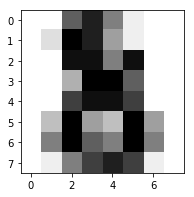

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

And this is the prediction:

In [17]:
clf.predict(digits.data[-1:])

array([8])

Image classification can be a challenging task, especially if the images are low resolution. Do you agree with the classifier?

## Displaying results of an image classification task

Let us re-run the `digits` dataset example using the first half of the images for training and the second half for prediction. We are going to use Matplotlib to plot some of the images and get graphical insights.

First, let us load the dataset and display the first 4 images from the training subset:

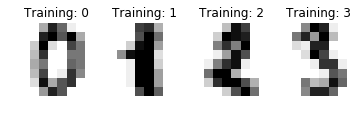

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
%matplotlib inline
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Then, let us proceed with some data preparation and the actual training:

In [19]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Finally, let's make predictions and visualise some of the outcomes:

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

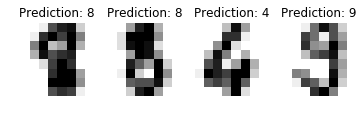

In [20]:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

## Model persistence

What if we want to save a trained model for future use? One possibility is to use Python’s built-in persistence model, `pickle`. First let us instantiate and train an estimator:

In [21]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC(gamma='scale')
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Then we can save our trained model to a string:

In [22]:
import pickle
s = pickle.dumps(clf)

And later on load it back and use it:

In [23]:
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In alternative, the `joblib` module can be used. It is more efficient on big data, but only allows to write to disk:

In [24]:
from joblib import dump, load
dump(clf, 'filename.joblib') 

['filename.joblib']

In [25]:
clf3 = load('filename.joblib')
clf3.predict(X[0:1])

array([0])

## Refitting the hyper-parameters

Suppose we have trained an estimator:

In [26]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC(kernel='linear')
clf.fit(X, y)  

clf.predict(X_test)

array([1, 0, 1, 1, 0])

Later on, we can update the hyper-parameters using the `set_params()` method. Re-calling the `fit()` method will then overwrite any previous training:

In [27]:
clf.set_params(kernel='rbf', gamma='scale').fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

## Choosing the hyper-parameters of the model

To tune the model hyper-parameters, we can use tools such as grid search and cross validation. 

As an example, let us optimize the classifier estimator for the `digits` dataset using cross-validation and the `sklearn.model_selection.GridSearchCV` object. Again, half of the available data will be used for training, and the other half for evaluation.

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

Now we are setting the hyper-parameters to be tuned:

In [30]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

Then tuning for a `precision` score:

In [31]:
score = 'precision'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" 
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

And finally tuning for a `recall` score:

In [32]:
score = 'recall'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                   scoring='%s_macro' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" 
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()



# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.019) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.957 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.019) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.028) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.019) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.019) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.026) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.972 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on t

Note how this is just a toy problem: the hyper-parameter plateau is too flat and the output model is the same for precision and recall with ties in quality.

# A clustering example for image segmentation

Let us generate an image with connected circles. We will then apply a Spectral Clustering model to separate them.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

Here, the spectral clustering approach solves the problem known as "normalized graph cuts": the image is seen as a graph of connected voxels, and the algorithm amounts to choosing graph cuts defining regions while minimizing the ratio of the gradient along the cut, and the volume of the region.

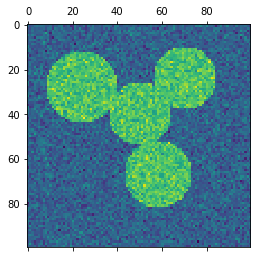

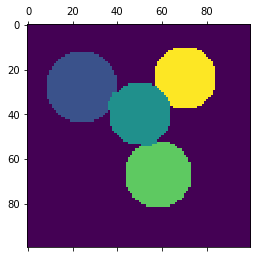

In [34]:
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)